# SysArmy - Serie histórica 2014.02 - 2020.02


## 1. Carga y normalización de datos de los diferentes datasets

###  1.1. Definición de metadata por dataset que define la forma de unir los diferentes conjuntos de datos

In [1]:
%load_ext nb_black

csv_url = "https://raw.githubusercontent.com/openqube/openqube-sueldos/release/2020.02/data/csv/argentina/{:04d}.{:02d}.csv"

"""

Salario Mínimo en Argentina
referencia: https://es.wikipedia.org/wiki/Anexo:Salario_m%C3%ADnimo_en_Argentina

1 de septiembre de 2014	4400 ARS
1 de enero de 2015	4716 ARS
1 de agosto de 2015	5588 ARS
1 de enero de 2016	6060 ARS
1 de junio de 2016	6810 ARS
1 de septiembre de 2016	7560 ARS
1 de enero de 2017	8060 ARS
1 de julio de 2017	8860 ARS
1 de enero de 2018	9500 ARS
1 de julio de 2018	10000 ARS
1 de septiembre de 2018	10700 ARS
1 de diciembre de 2018	11300 ARS
1 de marzo de 2019	11900 ARS
1 de marzo de 2019	12500 ARS (as of Aug)
1 de febrero de 2020	16875 ARS (as of Oct)
"""

datasets_metadata = [
    # salaries are normalized to brute
    # dst = ['salary', 'salary_type' 'location', 'age', 'yoe', 'yip', 'role', 'stack']
    {
        "year": 2014,
        "part": 2,
        "skiprows": 0,
        "publish_date": "2015-01-01",
        "minimum_salary": 4400,
        "src": [
            "Salario bruto mensual (AR$)",
            "Salario bruto mensual (AR$)",  # net salary not available
            "Trabajo en",
            "Tengo",
            "Años de experiencia",
            "Años en el puesto actual",
            "Trabajo de",
            "Trabajo de",  # gender not available
            "Trabajo de",  # acquiescence is not vailable
        ],
    },
    {
        "year": 2015,
        "part": 1,
        "skiprows": 0,
        "publish_date": "2015-09-01",
        "minimum_salary": 4716,
        "src": [
            "Salario bruto mensual (AR$)",
            "Salario bruto mensual (AR$)",  # net salary not available
            "Trabajo en",
            "Tengo",
            "Años de experiencia",
            "Años en el puesto actual",
            "Trabajo de",
            "Trabajo de",  # gender not available
            "Trabajo de",  # acquiescence is not vailable
        ],
    },
    {
        "year": 2016,
        "part": 1,
        "skiprows": 0,
        "publish_date": "2016-02-01",
        "minimum_salary": 6060,
        "src": [
            "Salario mensual (AR$)",
            "Bruto o neto?",
            "Trabajo en",
            "Tengo",
            "Años de experiencia",
            "Años en el puesto actual",
            "Trabajo de",
            "Soy",
            "Qué tan conforme estás con tu sueldo?",
        ],
    },
    {
        "year": 2016,
        "part": 2,
        "skiprows": 0,
        "publish_date": "2016-08-01",
        "minimum_salary": 6810,
        "src": [
            "Salario mensual (en tu moneda local)",
            "Bruto o neto?",
            "Argentina",
            "Tengo",
            "Años de experiencia",
            "Años en el puesto actual",
            "Trabajo de",
            "Soy",
            "Qué tan conforme estás con tu sueldo?",
        ],
    },
    {
        "year": 2017,
        "part": 1,
        "skiprows": 0,
        "publish_date": "2017-02-01",
        "minimum_salary": 8060,
        "src": [
            "Salario mensual (en tu moneda local)",
            "Bruto o neto?",
            "Argentina",
            "Tengo",
            "Años de experiencia",
            "Años en el puesto actual",
            "Trabajo de",
            "Soy",
            "Qué tan conforme estás con tu sueldo?",
        ],
    },
    {
        "year": 2017,
        "part": 2,
        "skiprows": 0,
        "publish_date": "2017-09-01",
        "minimum_salary": 8860,
        "src": [
            "Salario mensual (en tu moneda local)",
            "¿Bruto o neto?",
            "Argentina",
            "Tengo",
            "Años de experiencia",
            "Años en el puesto actual",
            "Trabajo de",
            "Me identifico",
            "¿Qué tan conforme estás con tu sueldo?",
        ],
    },
    {
        "year": 2018,
        "part": 1,
        "skiprows": 0,
        "publish_date": "2018-03-01",
        "minimum_salary": 9500,
        "src": [
            "Salario mensual (en tu moneda local)",
            "¿Bruto o neto?",
            "Argentina",
            "Tengo",
            "Años de experiencia",
            "Años en el puesto actual",
            "Trabajo de",
            "Me identifico",
            "¿Qué tan conforme estás con tu sueldo?",
        ],
    },
    {
        "year": 2018,
        "part": 2,
        "skiprows": 3,
        "publish_date": "2018-09-04",
        "minimum_salary": 10700,
        "src": [
            "Salario mensual (en tu moneda local)",
            "¿Bruto o neto?",
            "Argentina",
            "Tengo",
            "Años de experiencia",
            "Años en el puesto actual",
            "Trabajo de",
            "Me identifico",
            "¿Qué tan conforme estás con tu sueldo?",
        ],
    },
    {
        "year": 2019,
        "part": 1,
        "skiprows": 0,
        "publish_date": "2019-02-15",
        "minimum_salary": 11300,
        "src": [
            "Salario mensual BRUTO (en tu moneda local)",
            "Salario mensual BRUTO (en tu moneda local)",
            "Dónde estás trabajando",
            "Tengo",
            "Años de experiencia",
            "Años en el puesto actual",
            "Trabajo de",
            "Me identifico",
            "¿Qué tan conforme estás con tu sueldo?",
        ],
    },
    {
        "year": 2019,
        "part": 2,
        "skiprows": 0,
        "publish_date": "2019-08-15",
        "minimum_salary": 12500,
        "src": [
            "Salario mensual BRUTO (en tu moneda local)",
            "Salario mensual BRUTO (en tu moneda local)",
            "Dónde estás trabajando",
            "Tengo",
            "Años de experiencia",
            "Años en el puesto actual",
            "Trabajo de",
            "Me identifico",
            "¿Qué tan conforme estás con tu sueldo?",
        ],
    },
    {
        "year": 2020,
        "part": 1,
        "skiprows": 0,
        "publish_date": "2020-02-02",
        "minimum_salary": 16875,
        "src": [
            "Salario mensual BRUTO (en tu moneda local)",
            "Salario mensual BRUTO (en tu moneda local)",
            "Dónde estás trabajando",
            "Tengo",
            "Años de experiencia",
            "Años en el puesto actual",
            "Trabajo de",
            "Me identifico",
            "¿Qué tan conforme estás con tu sueldo?",
        ],
    },
    {
        "year": 2020,
        "part": 2,
        "skiprows": 0,
        "publish_date": "2020-08-15",
        "minimum_salary": 16875,
        "src": [
            "Salario mensual BRUTO (en tu moneda local)",
            "Salario mensual BRUTO (en tu moneda local)",
            "Dónde estás trabajando",
            "Tengo",
            "Años de experiencia",
            "Años en el puesto actual",
            "Trabajo de",
            "Me identifico",
            "¿Qué tan conforme estás con tu sueldo?",
        ],
    },
]

import datetime

final_publish_date = datetime.date(2020, 8, 15)

<IPython.core.display.Javascript object>

### 1.2. Iteramos los metadatos por dataset y cargamos los valores del repositorio

In [2]:
import pandas as pd
import io
import requests
from time import sleep

raw_dataframes = []
for dataset in datasets_metadata:
    source = requests.get(csv_url.format(dataset["year"], dataset["part"])).content
    print(csv_url.format(dataset["year"], dataset["part"]))
    raw_dataframes.append(
        pd.read_csv(
            io.StringIO(source.decode("utf-8")),
            skiprows=dataset["skiprows"],
            thousands=".",
            decimal=",",
        )
    )
    sleep(2)  ## avoid rate limits

https://raw.githubusercontent.com/openqube/openqube-sueldos/release/2020.02/data/csv/argentina/2014.02.csv
https://raw.githubusercontent.com/openqube/openqube-sueldos/release/2020.02/data/csv/argentina/2015.01.csv
https://raw.githubusercontent.com/openqube/openqube-sueldos/release/2020.02/data/csv/argentina/2016.01.csv
https://raw.githubusercontent.com/openqube/openqube-sueldos/release/2020.02/data/csv/argentina/2016.02.csv
https://raw.githubusercontent.com/openqube/openqube-sueldos/release/2020.02/data/csv/argentina/2017.01.csv
https://raw.githubusercontent.com/openqube/openqube-sueldos/release/2020.02/data/csv/argentina/2017.02.csv
https://raw.githubusercontent.com/openqube/openqube-sueldos/release/2020.02/data/csv/argentina/2018.01.csv
https://raw.githubusercontent.com/openqube/openqube-sueldos/release/2020.02/data/csv/argentina/2018.02.csv
https://raw.githubusercontent.com/openqube/openqube-sueldos/release/2020.02/data/csv/argentina/2019.01.csv
https://raw.githubusercontent.com/ope

<IPython.core.display.Javascript object>

### 1.3. Combinamos los diferentes datasets en forma de Union en un nuevo Dataframe

In [3]:
import numpy as np

dst_cols = [
    "salary",
    "salary_type",
    "location",
    "age",
    "yoe",  # years of experience
    "yip",  # years in position
    "role",
    "gender",
    "acquiescence",
]

dataframes = []
for i, dataset in enumerate(datasets_metadata):
    print(dataset)
    df = pd.DataFrame(raw_dataframes[i][dataset["src"]].values, columns=dst_cols)
    df["part"] = dataset["part"]
    df["publish_date"] = pd.to_datetime(dataset["publish_date"])
    dataframes.append(df)

combined_dataframe = pd.concat(dataframes)
combined_dataframe

{'year': 2014, 'part': 2, 'skiprows': 0, 'publish_date': '2015-01-01', 'minimum_salary': 4400, 'src': ['Salario bruto mensual (AR$)', 'Salario bruto mensual (AR$)', 'Trabajo en', 'Tengo', 'Años de experiencia', 'Años en el puesto actual', 'Trabajo de', 'Trabajo de', 'Trabajo de']}
{'year': 2015, 'part': 1, 'skiprows': 0, 'publish_date': '2015-09-01', 'minimum_salary': 4716, 'src': ['Salario bruto mensual (AR$)', 'Salario bruto mensual (AR$)', 'Trabajo en', 'Tengo', 'Años de experiencia', 'Años en el puesto actual', 'Trabajo de', 'Trabajo de', 'Trabajo de']}
{'year': 2016, 'part': 1, 'skiprows': 0, 'publish_date': '2016-02-01', 'minimum_salary': 6060, 'src': ['Salario mensual (AR$)', 'Bruto o neto?', 'Trabajo en', 'Tengo', 'Años de experiencia', 'Años en el puesto actual', 'Trabajo de', 'Soy', 'Qué tan conforme estás con tu sueldo?']}
{'year': 2016, 'part': 2, 'skiprows': 0, 'publish_date': '2016-08-01', 'minimum_salary': 6810, 'src': ['Salario mensual (en tu moneda local)', 'Bruto o ne

,salary,salary_type,location,age,yoe,yip,role,gender,acquiescence,part,publish_date
0,21000,21000,Ciudad Autónoma de Buenos Aires,27 - 30,5 - 7,Menos de un año,SysAdmin,SysAdmin,SysAdmin,2,2015-01-01
1,10000,10000,Ciudad Autónoma de Buenos Aires,35 - 40,10+,2 - 4,SysAdmin,SysAdmin,SysAdmin,2,2015-01-01
2,16000,16000,Córdoba,27 - 30,3 - 5,1 - 2,DevOps,DevOps,DevOps,2,2015-01-01
3,2377113,2377113,Ciudad Autónoma de Buenos Aires,27 - 30,5 - 7,1 - 2,SysAdmin,SysAdmin,SysAdmin,2,2015-01-01
4,16000,16000,Ciudad Autónoma de Buenos Aires,30 - 33,10+,2 - 4,DevOps,DevOps,DevOps,2,2015-01-01
...,...,...,...,...,...,...,...,...,...,...,...
6302,165000,165000,GBA,27,5,1,Developer,Hombre,3,2,2020-08-15
6303,100000,100000,Ciudad Autónoma de Buenos Aires,28,3,1,Developer,Hombre,3,2,2020-08-15
6304,62000,62000,GBA,30,10,3,Infosec,Hombre,1,2,2020-08-15
6305,59000,59000,Entre Ríos,28,6,4,QA / Tester,Hombre,2,2,2020-08-15


<IPython.core.display.Javascript object>

### 1.4. Normalizamos columnas del Dataframe

In [4]:
import re

dataframe = combined_dataframe.copy()

# normalize salary column
## cast to float the salary column, some datasets get wrongly parsed due to crappy user input
dataframe["salary"] = dataframe["salary"].astype(float)
mask = dataframe["salary_type"].astype(str).str.contains("Neto")
net_factor = np.array([1.0] * len(dataframe))
## scales up net salary into brute, given Argentina's social security contributions
net_factor[mask] = 1 / 0.83
dataframe["salary"] = net_factor * dataframe["salary"]
dataframe.drop(["salary_type"], axis=1, inplace=True)

# the first two dataframes do not have any gender information
mask = dataframe.eval('publish_date in ["2015-01-01", "2015-09-01"]')
dataframe.loc[mask, "gender"] = None
dataframe.loc[mask, "acquiescence"] = 0

# normalize age column
dataframe["age"] = dataframe["age"].astype(str)

dataframe

,salary,location,age,yoe,yip,role,gender,acquiescence,part,publish_date
0,21000.0,Ciudad Autónoma de Buenos Aires,27 - 30,5 - 7,Menos de un año,SysAdmin,None,0,2,2015-01-01
1,10000.0,Ciudad Autónoma de Buenos Aires,35 - 40,10+,2 - 4,SysAdmin,None,0,2,2015-01-01
2,16000.0,Córdoba,27 - 30,3 - 5,1 - 2,DevOps,None,0,2,2015-01-01
3,2377113.0,Ciudad Autónoma de Buenos Aires,27 - 30,5 - 7,1 - 2,SysAdmin,None,0,2,2015-01-01
4,16000.0,Ciudad Autónoma de Buenos Aires,30 - 33,10+,2 - 4,DevOps,None,0,2,2015-01-01
...,...,...,...,...,...,...,...,...,...,...
6302,165000.0,GBA,27,5,1,Developer,Hombre,3,2,2020-08-15
6303,100000.0,Ciudad Autónoma de Buenos Aires,28,3,1,Developer,Hombre,3,2,2020-08-15
6304,62000.0,GBA,30,10,3,Infosec,Hombre,1,2,2020-08-15
6305,59000.0,Entre Ríos,28,6,4,QA / Tester,Hombre,2,2,2020-08-15


<IPython.core.display.Javascript object>

### 1.5. Eliminamos outliers

Para detectar correctamente outliers en la serie histórica, lo haremos en función de la columna salary, teniendo en cuenta el desplazamiento de estos valores debido a la inflación.  Para lograrlo, utilizaremos el método IQR, aplicándolo por muestra de manera aislada.

In [5]:
def remove_outlier(df_in, col_name, iqr_factor=1.5):
    """
  IQR outliers removal (https://machinelearningmastery.com/how-to-use-statistics-to-identify-outliers-in-data/)
  accept a dataframe, remove outliers, return cleaned data in a new dataframe
  see http://www.itl.nist.gov/div898/handbook/prc/section1/prc16.htm
  """
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3 - q1  # interquartile range
    fence_low = q1 - iqr_factor * iqr
    fence_high = q3 + iqr_factor * iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out


clean_dataframe = []
for dataset in datasets_metadata:
    publish_date = dataset["publish_date"]
    minimum_salary = dataset["minimum_salary"]
    df = dataframe.query("publish_date == @publish_date")
    # apply the IQR method with coefficient 3.5
    df = remove_outlier(df, "salary", 3.5)
    # also remove entries with salary under the minimum salary for that period
    df = df.query("salary >= @minimum_salary/2.0")
    clean_dataframe.append(df)


# remove salaries under Salario Mínimo: https://es.wikipedia.org/wiki/Anexo:Salario_m%C3%ADnimo_en_Argentina
dataframe = pd.concat(clean_dataframe)

<IPython.core.display.Javascript object>

## 2. Análisis de resultados

### 2.1. Plot de histogramas para verificar estado de sanitización y normalización de datos

In [6]:
charts = {}


def to_rechart(df, max=0):
    """
  if max is set, groups the exceeded rows into 'Otros' column, summing values
  """
    if max != 0:
        # df = df.sort_values(by, ascending=False)
        others = df[max:].sum()
        df = df[:max]
        df.loc["Otros"] = others
    return {
        "data": [
            {"name": str(name), **(data if isinstance(data, dict) else {"value": data})}
            for name, data in df.T.to_dict().items()
        ],
    }

<IPython.core.display.Javascript object>

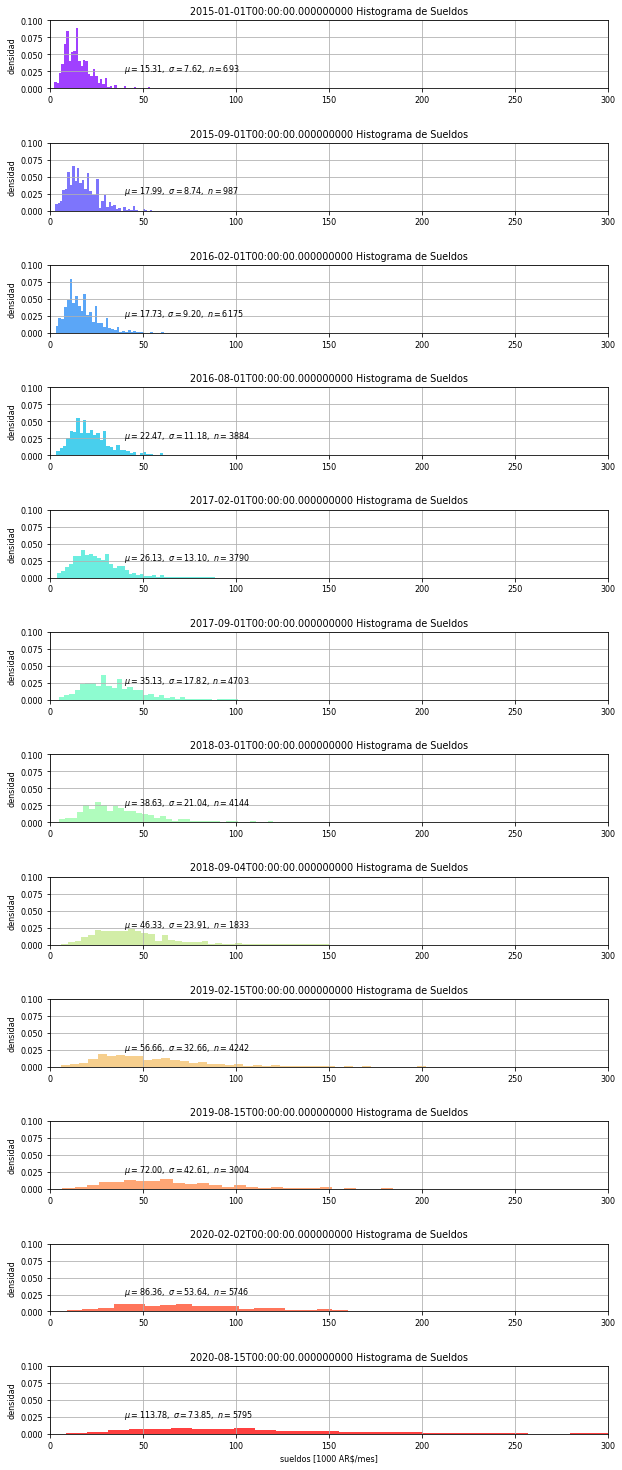

None

<IPython.core.display.Javascript object>

In [7]:
%matplotlib inline

import matplotlib.pyplot as plt
from matplotlib import cm

publish_dates = dataframe.publish_date.unique()
# generate a list of colors by period for easy visualization on next figures
colors = cm.rainbow(np.linspace(0, 1, len(publish_dates)))

plt.rcParams.update({"figure.figsize": (10.0, 26.0), "font.size": 8})
fig, ax = plt.subplots(len(publish_dates), 1)
for i, publish_date in enumerate(publish_dates):
    salary_series = dataframe.query("publish_date == @publish_date")["salary"]
    s = salary_series.apply(lambda x: float("{0:.2f}".format(round(x / 1000, 1))))
    mu, sigma = np.mean(s), np.std(s)

    n, bins, patches = ax[i].hist(s, bins=40, density=True, alpha=0.75, color=colors[i])
    ax[i].set_ylabel("densidad")
    ax[i].set_title(str(publish_date) + " Histograma de Sueldos")
    ax[i].text(40, 0.025, "$\mu=%.2f,\ \sigma=%.2f,\ n=%d$" % (mu, sigma, len(s)))
    ax[i].axis([0, 300, 0, 0.1])
    ax[i].grid(True)
ax[len(publish_dates) - 1].set_xlabel("sueldos [1000 AR$/mes]")

plt.subplots_adjust(hspace=0.8)
fig.canvas.draw()
display(plt.show())
plt.rcParams.update({"figure.figsize": (10.0, 6.0), "font.size": 8})

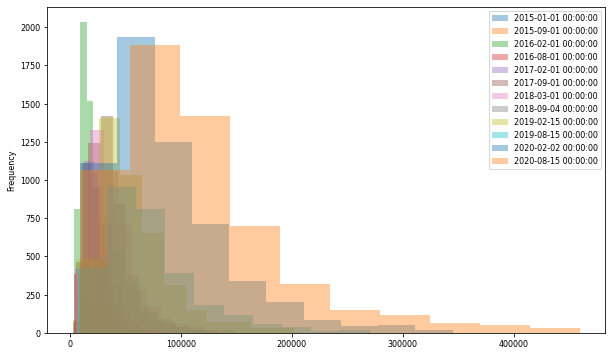

<IPython.core.display.Javascript object>

In [8]:
# superposición de histogramas
dataframe.groupby("publish_date")["salary"].plot(kind="hist", alpha=0.4)
plt.legend()

### 2.2. Plot de algunas mediciones históricas

#### 2.2.1. Salarios

<AxesSubplot:xlabel='publish_date'>

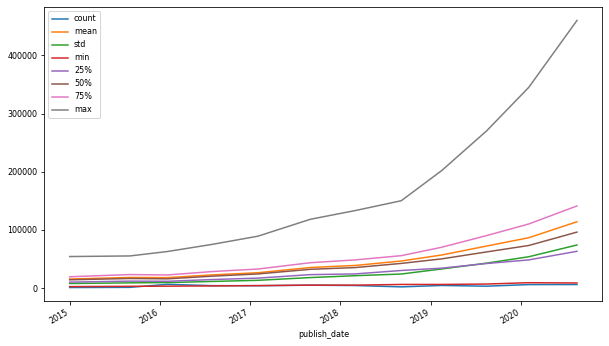

<IPython.core.display.Javascript object>

In [9]:
dataframe.groupby("publish_date").salary.describe().plot(kind="line")

gender,Hombre,Mujer,Otros
publish_date,,,
2016-02-01,2.959986,2.835227,0.000000
2016-08-01,2.977703,2.706081,0.000000
2017-02-01,2.448216,2.314869,0.000000
2017-09-01,2.552419,2.427350,2.315789
2018-03-01,2.523168,2.312830,2.142857
2018-09-04,2.586272,2.451883,1.833333
2019-02-15,2.548945,2.531549,2.333333
2019-08-15,2.651988,2.595745,2.800000
2020-02-02,2.550663,2.485924,2.791667


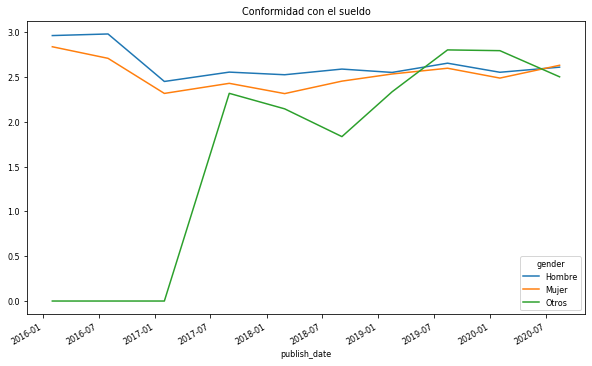

<IPython.core.display.Javascript object>

In [10]:
dataframe.acquiescence = pd.to_numeric(dataframe.acquiescence)
df = (
    dataframe.groupby(["publish_date", "gender"])
    .acquiescence.mean()
    .unstack("gender")
    .fillna(0)
)
df.plot(kind="line", title="Conformidad con el sueldo")
charts["historic_acquiescence_means"] = to_rechart(df)
display(df)

<ipython-input-11-02d6ffc1228e>:23: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df_currency.query(


[value    8.55205
 dtype: float64,
 value    9.3031
 dtype: float64,
 value    14.12675
 dtype: float64,
 value    14.89945
 dtype: float64,
 value    15.7975
 dtype: float64,
 value    17.255
 dtype: float64,
 value    20.2101
 dtype: float64,
 value    38.4793
 dtype: float64,
 value    38.40205
 dtype: float64,
 value    55.6513
 dtype: float64,
 value    60.56295
 dtype: float64,
 value    73.0452
 dtype: float64]

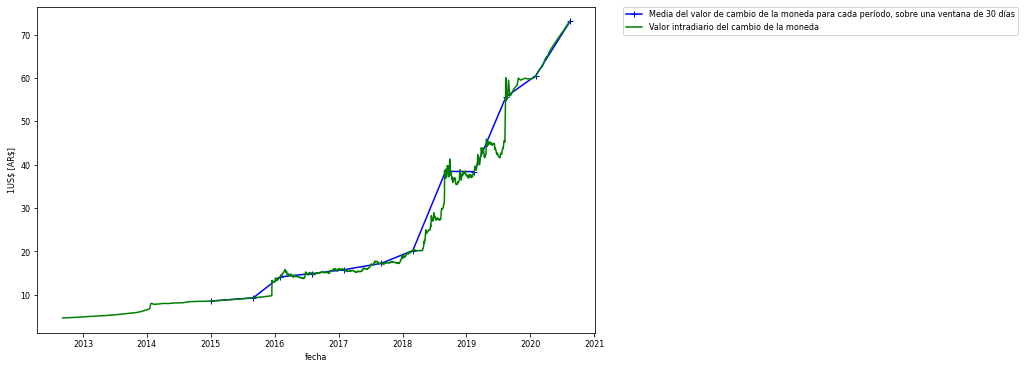

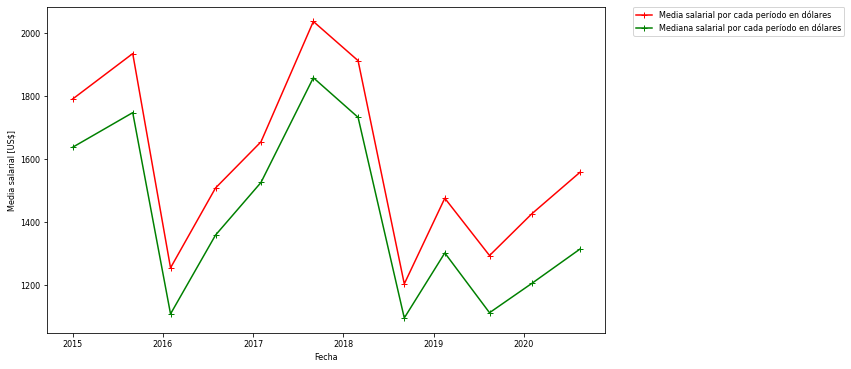

<IPython.core.display.Javascript object>

In [11]:
import io
import requests
import json
import datetime

%matplotlib inline

# https://www.bloomberg.com/markets/api/bulk-time-series/price/USDARS%3ACUR?timeFrame=5_YEAR
url = "https://raw.githubusercontent.com/openqube/openqube-sueldos/release/2020.02/data/currency-2020.02.json"
source = requests.get(url).content
data = json.loads(source)
df_currency = pd.DataFrame(data[0]["price"]).rename(
    index=str, columns={"dateTime": "date"}
)
df_currency.date = pd.to_datetime(df_currency.date)

plt.rcParams.update({"figure.figsize": (10.0, 6.0), "font.size": 8})

delta = np.timedelta64(5, "D")
dates = dataframe.publish_date.unique()

currencies = [
    df_currency.query(
        '(date >= "{}") & (date <= "{}")'.format(date - delta, date + delta)
    ).median()
    for date in dates
]
display(currencies)

salary_means = [
    dataframe.query("publish_date == @date").salary.mean() for date in dates
]

us_salary_means = [
    float(salary_mean / currencies[i]) for i, salary_mean in enumerate(salary_means)
]

years = [period["year"] for period in datasets_metadata]
parts = [period["part"] for period in datasets_metadata]

salary_medians = [
    dataframe.query("publish_date == @date").salary.median() for date in dates
]

us_salary_medians = [
    float(salary_median / currencies[i])
    for i, salary_median in enumerate(salary_medians)
]

plt.xlabel("fecha")
plt.ylabel("1US\$ [AR\$]")
plt.plot(
    dates,
    currencies,
    "+",
    label="Media del valor de cambio de la moneda para cada período, sobre una ventana de 30 días",
    ls="-",
    c="b",
)
plt.plot(
    df_currency.date,
    df_currency.value,
    label="Valor intradiario del cambio de la moneda",
    ls="-",
    c="g",
)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
plt.show()

plt.rcParams.update({"figure.figsize": (10.0, 6.0), "font.size": 8})
plt.xlabel("Fecha")
plt.ylabel("Media salarial [US\$]")
plt.plot(
    dates,
    us_salary_means,
    "+",
    label="Media salarial por cada período en dólares",
    ls="-",
    c="r",
)
plt.plot(
    dates,
    us_salary_medians,
    "+",
    label="Mediana salarial por cada período en dólares",
    ls="-",
    c="g",
)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
plt.show()

In [12]:
df = pd.DataFrame(
    np.array(
        [years, parts, pd.to_datetime(dates).date, salary_medians, us_salary_medians]
    ).T,
    columns=[
        "year",
        "part",
        "publish_date",
        "Pesos Argentinos",
        "Dólares Estadounidenses",
    ],
)
display(df)

charts["historic_salary_medians"] = to_rechart(df)

,year,part,publish_date,Pesos Argentinos,Dólares Estadounidenses
0,2014,2,2015-01-01,14000,1637.03
1,2015,1,2015-09-01,16250,1746.73
2,2016,1,2016-02-01,15662.7,1108.72
3,2016,2,2016-08-01,20241,1358.5
4,2017,1,2017-02-01,24096.4,1525.33
5,2017,2,2017-09-01,32048.2,1857.33
6,2018,1,2018-03-01,35000,1731.81
7,2018,2,2018-09-04,42168.7,1095.88
8,2019,1,2019-02-15,50000,1302.01
9,2019,2,2019-08-15,61914,1112.53


<IPython.core.display.Javascript object>

#### 2.2.2. Participación por género

count
publish_date gender          
2016-02-01   Hombre  0.942996
             Mujer   0.057004
2016-08-01   Hombre  0.923790
             Mujer   0.076210
2017-02-01   Hombre  0.909499
             Mujer   0.090501
2017-09-01   Hombre  0.896449
             Mujer   0.099511
             Otros   0.004040
2018-03-01   Hombre  0.859315
             Mujer   0.137307
             Otros   0.003378
2018-09-04   Hombre  0.866339
             Mujer   0.130387
             Otros   0.003273
2019-02-15   Hombre  0.871759
             Mujer   0.123291
             Otros   0.004950
2019-08-15   Hombre  0.854194
             Mujer   0.140812
             Otros   0.004993
2020-02-02   Hombre  0.853637
             Mujer   0.142186
             Otros   0.004177
2020-08-15   Hombre  0.846074
             Mujer   0.148749
             Otros   0.005177

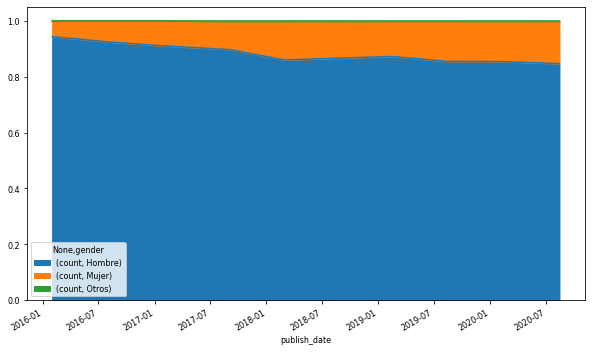

<IPython.core.display.Javascript object>

In [13]:
gender_count = (
    dataframe.groupby(["publish_date", "gender"])
    .gender.count()
    .rename("count")
    .fillna(0)
    .to_frame()
)
gender_percent = gender_count / gender_count.groupby("publish_date").sum()
display(gender_percent)

gender_percent.unstack("gender").plot(kind="area")
charts["historic_gender_percent"] = to_rechart(gender_percent)

salary
publish_date gender               
2016-02-01   Hombre   15662.650602
             Mujer    14457.831325
2016-08-01   Hombre   20481.927711
             Mujer    18072.289157
2017-02-01   Hombre   24096.385542
             Mujer    21084.337349
2017-09-01   Hombre   32530.120482
             Mujer    30000.000000
             Otros    33734.939759
2018-03-01   Hombre   36144.578313
             Mujer    30000.000000
             Otros    26605.421687
2018-09-04   Hombre   42525.000000
             Mujer    35000.000000
             Otros    34337.349398
2019-02-15   Hombre   50000.000000
             Mujer    42000.000000
             Otros    45000.000000
2019-08-15   Hombre   63000.000000
             Mujer    55000.000000
             Otros    49000.000000
2020-02-02   Hombre   75000.000000
             Mujer    62000.000000
             Otros    56375.000000
2020-08-15   Hombre  100000.000000
             Mujer    83000.000000
             Otros    95500.000000

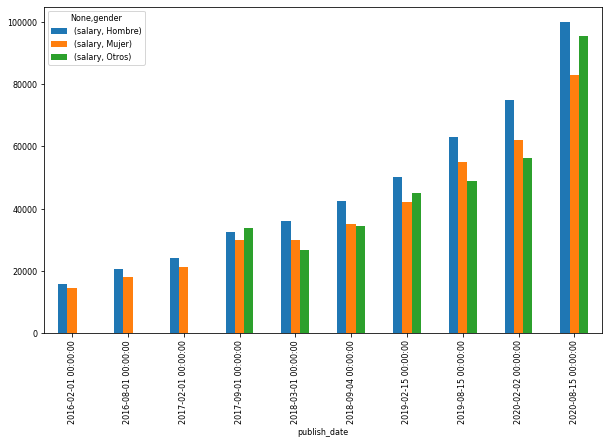

<IPython.core.display.Javascript object>

In [14]:
gender_salary_median = (
    dataframe.groupby(["publish_date", "gender"])
    .salary.median()
    .rename("salary")
    .fillna(0)
    .to_frame()
)
display(gender_salary_median)

gender_salary_median.unstack("gender").plot(kind="bar")
charts["historic_gender_salary_median"] = to_rechart(gender_salary_median)

## 3. Publicación

In [15]:
import json


display(json.dumps(charts, allow_nan=False, default=str))

'{"historic_acquiescence_means": {"data": [{"name": "2016-02-01 00:00:00", "Hombre": 2.959986261377297, "Mujer": 2.835227272727273, "Otros": 0.0}, {"name": "2016-08-01 00:00:00", "Hombre": 2.9777034559643254, "Mujer": 2.706081081081081, "Otros": 0.0}, {"name": "2017-02-01 00:00:00", "Hombre": 2.4482158398607483, "Mujer": 2.314868804664723, "Otros": 0.0}, {"name": "2017-09-01 00:00:00", "Hombre": 2.5524193548387095, "Mujer": 2.427350427350427, "Otros": 2.3157894736842106}, {"name": "2018-03-01 00:00:00", "Hombre": 2.523167649536647, "Mujer": 2.3128295254833042, "Otros": 2.142857142857143}, {"name": "2018-09-04 00:00:00", "Hombre": 2.586272040302267, "Mujer": 2.4518828451882846, "Otros": 1.8333333333333333}, {"name": "2019-02-15 00:00:00", "Hombre": 2.5489453758788536, "Mujer": 2.5315487571701722, "Otros": 2.3333333333333335}, {"name": "2019-08-15 00:00:00", "Hombre": 2.651987529228371, "Mujer": 2.595744680851064, "Otros": 2.8}, {"name": "2020-02-02 00:00:00", "Hombre": 2.550662589194699

<IPython.core.display.Javascript object>